# 'Audience Rating' prediction using Rotten Tomatoes Movies [Dataset](https://insights.zohorecruit.com/ck1/2d6f.390d3f0/8110f310-bbae-11ef-8832-525400fa05f6/5e9d1515b5838c744d2bbe6ef0ea565aa2b1907d/2?e=XLROTa1eTGA%2FR1EjKs%2FxqzF2vFq3thEDANZDdhs2RFi9byvWl6Tb6dPKVC%2BE%2B%2FEn72TIWM469mi3yJluw0ZUoAErjkchndep1QZeY0l9U8zKM4UXhXGmkTf7UrUpVxBvoWTRqy8mQa5LWiI%2FXtJYHg%3D%3D)

Submitted By: Dhanashree N P (dhan0110@gmail.com)

### Problem Statment
With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.
### Approach

1. [Install/import necessary libraries](#id1)
2. [Load the data](#id2)
3. [Perform basic EDA to understand the data](#id3)
4. [Pre-process to handle missing values, duplicate rows, drop irrelevant columns, transformation and normalization of selected columns](#id4)
5. [Split the processed data to train/test](#id5)
6. [Choose a regression algorithm and build the model as value to be predicted is numerical](#id6)
7. [Model summary](#id7)
8. [Package the steps as a pipeline](#id8)
9. [Observations and Conclusion](#id9)

<a id="id1"></a>

### 1. Import the required libraries

In [271]:
import pandas as pd
import seaborn as sns
import numpy as np
#!pip install xlrd

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<a id="id2"></a>

### 2. Load the dataset 
After download to working directory. Check the first few lines

In [274]:
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')
data.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0


We can see that there's a combination of text, date and numerical values in the dataset. Let's do some basic EDA

<a id="id3"></a>

### 3. Exploratory Data Analysis

In [278]:
# Original dataset row/column counts
(rows, cols) = data.shape
print('Dataset has {} records with {} original features excluding "audience_rating"'.format(rows,cols-1))

Dataset has 16638 records with 15 original features excluding "audience_rating"


In [279]:
# Summary of the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [280]:
# Basic descriptive summary of all the columns
data.describe(include='all')

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
count,16638,16614,8309,16638,16621,16524,15289,16354,15823,16636,16483.000000,16222,16638,16638.000000,16638.000000,16386.000000
unique,16106,16613,8307,8,1080,8314,12121,16326,NaN,NaN,NaN,2886,3,NaN,NaN,NaN
top,Home,An adaptation of the Broadway drama about Prin...,"Extinction has a few intriguing ideas, but the...",R,Drama,Alfred Hitchcock,Woody Allen,Chris Rock,NaN,NaN,NaN,Paramount Pictures,Rotten,NaN,NaN,NaN
freq,5,2,2,6136,1727,36,33,4,NaN,NaN,NaN,497,7233,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,NaN,NaN,60.466522,56.607104,60.470829
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,NaN,NaN,0.000000,5.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,NaN,NaN,38.000000,12.000000,45.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,NaN,NaN,66.000000,28.000000,62.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,NaN,NaN,86.000000,76.000000,77.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,NaN,NaN,100.000000,497.000000,100.000000


In [281]:
# Check for duplicate rows:
print('There are {} duplicate row(s)'.format(data.duplicated().sum()))

There are 1 duplicate row(s)


In [282]:
data[data.duplicated()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
8496,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0


In [283]:
# Let's look at the summary of missing values in the dataset. We are considering how much percentage of rows have them missing
pd.DataFrame(round((data.isnull().sum()/rows)*100,2), columns = ['Missing Percentage']).sort_values(by='Missing Percentage',ascending=False)

,Missing Percentage
critics_consensus,50.06
writers,8.11
in_theaters_date,4.90
studio_name,2.50
cast,1.71
audience_rating,1.51
runtime_in_minutes,0.93
directors,0.69
movie_info,0.14
genre,0.10


#### 3.1 Observations from basic EDA

1. From this result, we can see that the column **critics_consensus** has 50% of values missing. Instead of imputing, we can drop this column.
2. Less than 2% of rows have **audience_rating** missing. Since this is the target variable, it is advised to drop these rows.
3. Dataset has **1 duplicate row**. This can be removed
4. Since other columns with missing values are for less than 10% records, we can try to impute the records or remove them after a basic level of feature engineering. 

<a id="id4"></a>

### 4. Feature Selection / Feature Engineering 
#### 4.1 Data Pre-processing

Apart from the points above, 
1. Going for a simple model approach - we can drop the **movie_title**, **movie_info** , **directors**, **writers**, **cast**, **studio_name** columns . This is after considering the number of unique values, if categorical encoding were to be done, the feature set would have a very high dimension.
2. Instead of considering both **in_theaters_date** and **on_streaming_date** - consider only the **year** the movie was available for viewers. After extracting the year - these columns can be removed

In [289]:
# Extract the year when the movie was first available to view (theater / streaming)
data['year'] = np.where(data['in_theaters_date'].notna(), pd.to_datetime(data['in_theaters_date']).dt.year, pd.to_datetime(data['on_streaming_date']).dt.year)

In [290]:
# Drop the columns not required, duplicate rows and rows that have missing values for 'audience_rating'
cols_to_drop = ['movie_title', 'movie_info','critics_consensus','writers','cast','directors', 'in_theaters_date','on_streaming_date','studio_name']
data.drop(columns=cols_to_drop,inplace=True)
data.drop_duplicates(inplace=True)
data = data[data['audience_rating'].notna()]
data.reset_index(inplace=True,drop=True)

In [291]:
(rows, cols) = data.shape
print('The dataset now has {} records and {} features excluding "audience_rating"'.format(rows,cols-1))

The dataset now has 16385 records and 7 features excluding "audience_rating"


In [292]:
data.columns

Index(['rating', 'genre', 'runtime_in_minutes', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'year'],
      dtype='object')

In [293]:
data.describe(include='all')

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,year
count,16385,16368,16238.000000,16385,16385.000000,16385.000000,16385.00000,16384.000000
unique,8,1075,NaN,3,NaN,NaN,NaN,NaN
top,R,Drama,NaN,Rotten,NaN,NaN,NaN,NaN
freq,6116,1686,NaN,7160,NaN,NaN,NaN,NaN
mean,NaN,NaN,102.564417,NaN,60.325542,57.275862,60.47159,1999.801453
std,NaN,NaN,25.039623,NaN,28.587843,66.639490,20.46276,19.228699
min,NaN,NaN,1.000000,NaN,0.000000,5.000000,0.00000,1914.000000
25%,NaN,NaN,90.000000,NaN,38.000000,12.000000,45.00000,1994.000000
50%,NaN,NaN,99.000000,NaN,66.000000,29.000000,62.00000,2006.000000
75%,NaN,NaN,111.000000,NaN,85.000000,78.000000,77.00000,2013.000000


In [294]:
# Let's now look at how many missing values are there
data.isna().sum()

rating                  0
genre                  17
runtime_in_minutes    147
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating         0
year                    1
dtype: int64

#### 4.2 Handling missing values
Let's use a simple imputing technique to replace missing values in genre, studio_name using 'most frequent value' and  year, runtime_in_minutes using the mean value of the column based on the above two outputs.

In [296]:
num_cols = ['year', 'runtime_in_minutes']
cat_cols = ['genre']

num_imputer = SimpleImputer(strategy='mean')  # For numerical columns, use mean value to impute
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns, use most frequent value to impute

# Apply imputers to the respective columns
data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [297]:
data.isna().sum()

rating                0
genre                 0
runtime_in_minutes    0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
year                  0
dtype: int64

Once imputing is done, there are no more missing values

#### 4.3 Data Transformation - Binning

Focusing on two columns - **year** and **runtime_in_minutes**. The numerical values do not have a direct significance on the target variable **audience_rating**. Instead these can be handled as follows:
1. The exact year of movie has no direct significance, we can consider movies as released during 2000s or before. (1900s and 2000s)
2. Consider a new column **movie_duration** derived from **runtime_in_minutes** that indicates whether movie is **short, long** or **average** length in duration

In [301]:
# As the year of movie has no direct significance, we can consider movies as released during 2000s or before.
bins = [1900, 1999, 2099]  # Defines two bins: 1900-1999, 2000-2099
labels = ['1900s', '2000s']  # Labels for the bins

# Let's create a new column 'decade' by categorizing the year into these bins
data['decade'] = pd.cut(data['year'], bins=bins, labels=labels, right=True)

In [302]:
# Creating a new column duration to capture the essence of length of movie

q1 = data['runtime_in_minutes'].quantile(0.33)  # 33rd percentile
q2 = data['runtime_in_minutes'].quantile(0.66)  # 66th percentile

# Function to categorize based on quantiles
def categorize_number(value):
    if value < q1:
        return "short"
    elif q1 <= value <= q2:
        return "average"
    else:
        return "long"

# Apply the categorization to the column
data['movie_duration'] = data['runtime_in_minutes'].apply(categorize_number)
data.head(2)

,rating,genre,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,year,decade,movie_duration
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",83.0,Rotten,49,144,53.0,2010.0,2000s,short
1,R,Comedy,90.0,Certified Fresh,86,140,64.0,2010.0,2000s,short


#### 4.4 Data Transformation - Encoding, Binarization

The following transformations will be done on categorical columns :
##### 4.4.1. One Hot Encoding - **rating**,**tomatometer_status**, **decade** and **movie_duration** colums 
- **tomatometer_status** (Rotten/Fresh/Certified Fresh)
- **rating** - remove unwanted characters in the values before transformation
- **decade** - 1900s and 2000s
- **movie_duration** - short, average, long


In [305]:
data.tomatometer_status.value_counts()

tomatometer_status
Rotten             7160
Fresh              6274
Certified Fresh    2951
Name: count, dtype: int64

In [306]:
# Let's first check the rating column
data.rating.unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

We can see that there are unwanted ) in a few values. Let's fix this

In [308]:
data.rating = data.rating.str.replace(')','')
data.rating.value_counts()

rating
R        6117
NR       4649
PG-13    2879
PG       2051
G         652
NC17       37
Name: count, dtype: int64

In [309]:
data['movie_duration'].value_counts()

movie_duration
average    5972
long       5382
short      5031
Name: count, dtype: int64

In [310]:
data.decade.value_counts()

decade
2000s    10864
1900s     5521
Name: count, dtype: int64

In [311]:
one_hot_enc = OneHotEncoder(sparse_output=False, drop='first')
onehotcat = one_hot_enc.fit_transform(data[['rating','tomatometer_status', 'decade','movie_duration']])
#onehotcat = one_hot_enc.fit_transform(data[['tomatometer_status', 'decade','movie_duration']])
cat_enc_df = pd.DataFrame(onehotcat, columns = one_hot_enc.get_feature_names_out(),dtype=int)
cat_enc_df.head(3)

,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R,tomatometer_status_Fresh,tomatometer_status_Rotten,decade_2000s,movie_duration_long,movie_duration_short
0,0,0,1,0,0,0,1,1,0,1
1,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,1,1,0,0,1,0


##### 4.4.2. MultiLabelBinarizer - **genres** (after converting to each string to list of genres). 
This way only 21 new columns will be created instead of 1000+ new columns. Instead of creating one-hot encoding for each unique combination of genres, we can use a binary encoding for the unique genres (1 if movie has the genre 0 if not)


In [313]:
# Let's convert the genre column to have a list of genres as value instead of string of genres.
data['genre'] = data['genre'].apply(lambda x: sorted(x.split(', ')))

In [314]:
mlb = MultiLabelBinarizer()
genres = mlb.fit_transform(data['genre'])
genres_df = pd.DataFrame(genres, columns=mlb.classes_,dtype=int)
genres_df.head(3)

,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [315]:
data.columns

Index(['rating', 'genre', 'runtime_in_minutes', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'year',
       'decade', 'movie_duration'],
      dtype='object')

#### 4.5 Data Transformation - Scaling

The **tomatometer_rating** and **tomatometer_count** to have values between 0 and 1 as all other predictor columns are binary

In [318]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns (e.g., 'col1' and 'col2')
data[['tomatometer_rating', 'tomatometer_count']] = scaler.fit_transform(data[['tomatometer_rating', 'tomatometer_count']])

In [319]:
cols_to_include = ['tomatometer_rating','tomatometer_count','audience_rating']
new_data = pd.concat([data[cols_to_include], cat_enc_df, genres_df],axis=1)

In [320]:
new_data.columns

Index(['tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'rating_NC17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'tomatometer_status_Fresh', 'tomatometer_status_Rotten', 'decade_2000s',
       'movie_duration_long', 'movie_duration_short', 'Action & Adventure',
       'Animation', 'Anime & Manga', 'Art House & International', 'Classics',
       'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality',
       'Gay & Lesbian', 'Horror', 'Kids & Family', 'Musical & Performing Arts',
       'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy',
       'Special Interest', 'Sports & Fitness', 'Television', 'Western'],
      dtype='object')

In [321]:
# Let's look at the correlation score to see if we can drop any columns further
new_data.corr()

,tomatometer_rating,tomatometer_count,audience_rating,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R,tomatometer_status_Fresh,tomatometer_status_Rotten,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
tomatometer_rating,1.000000,0.083849,0.660209,0.013581,0.273272,-0.013553,-0.174197,-0.136536,0.537733,-0.868027,...,-0.119375,-0.048852,0.094688,-0.091545,0.003057,-0.060494,0.168388,0.037549,0.050764,0.039261
tomatometer_count,0.083849,1.000000,0.140989,-0.004075,-0.321206,-0.012233,0.286376,0.107721,-0.287498,-0.066041,...,-0.060007,0.031174,-0.060243,0.024023,-0.000699,0.127827,-0.088342,-0.015213,-0.059416,-0.039726
audience_rating,0.660209,0.140989,1.000000,0.017063,0.106776,0.042045,-0.025461,-0.140921,0.292176,-0.578881,...,-0.247934,-0.005925,0.129060,-0.158595,0.053427,-0.069899,0.157153,0.065641,0.036015,0.026500
rating_NC17,0.013581,-0.004075,0.017063,1.000000,-0.029943,-0.017996,-0.021965,-0.036719,0.012782,-0.013398,...,0.011148,-0.012531,-0.011796,0.011299,0.028581,0.000362,-0.003415,-0.004914,0.004568,-0.006307
rating_NR,0.273272,-0.321206,0.106776,-0.029943,1.000000,-0.238078,-0.290588,-0.485787,0.319405,-0.240608,...,-0.019796,-0.108066,0.063020,-0.075161,-0.024089,-0.082633,0.188282,0.014456,0.061923,-0.002387
rating_PG,-0.013553,-0.012233,0.042045,-0.017996,-0.238078,1.000000,-0.174645,-0.291961,-0.014551,0.012175,...,-0.086837,0.323428,0.016745,-0.083246,0.004242,0.087598,-0.012136,0.051146,0.008586,0.016386
rating_PG-13,-0.174197,0.286376,-0.025461,-0.021965,-0.290588,-0.174645,1.000000,-0.356356,-0.170035,0.152254,...,-0.067376,-0.082544,-0.027975,-0.038917,0.066438,0.085777,-0.059465,-0.002193,-0.036537,-0.020588
rating_R,-0.136536,0.107721,-0.140921,-0.036719,-0.485787,-0.291961,-0.356356,1.000000,-0.177620,0.121079,...,0.150258,-0.196127,-0.093606,0.188473,-0.038976,-0.079997,-0.117922,-0.045166,-0.048723,-0.014191
tomatometer_status_Fresh,0.537733,-0.287498,0.292176,0.012782,0.319405,-0.014551,-0.170035,-0.177620,1.000000,-0.693983,...,-0.033006,-0.041307,0.084181,-0.064129,0.014183,-0.058211,0.135385,0.026725,0.057639,0.035306
tomatometer_status_Rotten,-0.868027,-0.066041,-0.578881,-0.013398,-0.240608,0.012175,0.152254,0.121079,-0.693983,1.000000,...,0.095341,0.045202,-0.078327,0.083065,0.004795,0.054694,-0.152345,-0.036835,-0.047426,-0.025185


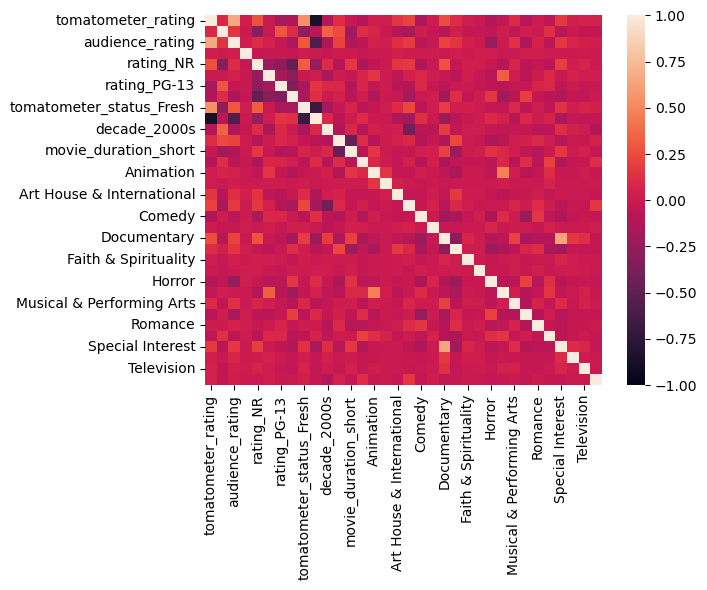

In [322]:
# Visualize the correlation scores as a heatmap
sns.heatmap(new_data.corr(),vmin=-1, vmax=1);

#### 4.6 Prepare the data - X, y

In [324]:
X = new_data.drop(columns=['audience_rating'])
y = new_data[['audience_rating']]

In [325]:
# Details of the dataset being used build the model

In [326]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16385 entries, 0 to 16384
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tomatometer_rating         16385 non-null  float64
 1   tomatometer_count          16385 non-null  float64
 2   rating_NC17                16385 non-null  int32  
 3   rating_NR                  16385 non-null  int32  
 4   rating_PG                  16385 non-null  int32  
 5   rating_PG-13               16385 non-null  int32  
 6   rating_R                   16385 non-null  int32  
 7   tomatometer_status_Fresh   16385 non-null  int32  
 8   tomatometer_status_Rotten  16385 non-null  int32  
 9   decade_2000s               16385 non-null  int32  
 10  movie_duration_long        16385 non-null  int32  
 11  movie_duration_short       16385 non-null  int32  
 12  Action & Adventure         16385 non-null  int32  
 13  Animation                  16385 non-null  int

In [327]:
X.describe()

,tomatometer_rating,tomatometer_count,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R,tomatometer_status_Fresh,tomatometer_status_Rotten,decade_2000s,...,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western
count,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,...,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000,16385.000000
mean,0.603255,0.106252,0.002258,0.283735,0.125175,0.175709,0.373329,0.382911,0.436985,0.663045,...,0.114556,0.064876,0.057919,0.201953,0.109612,0.105767,0.072688,0.010558,0.015258,0.017272
std,0.285878,0.135446,0.047468,0.450824,0.330928,0.380584,0.483703,0.486112,0.496028,0.472684,...,0.318495,0.246315,0.233597,0.401470,0.312416,0.307549,0.259632,0.102213,0.122580,0.130287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.014228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.048780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.850000,0.148374,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


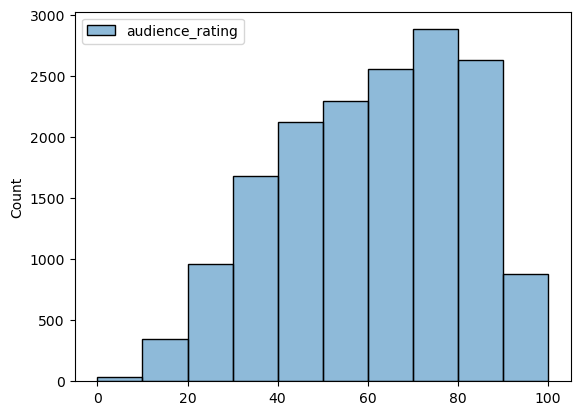

In [328]:
# Let's look at the distribution of audience_rating values
sns.histplot(data=y,bins=10);

<a id="id5"></a>

### 5. Split the dataset in to test and train sets.

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

<a id="id6"></a>

### 6. Build the Regression Model

Choosing a multi linear regression model

In [335]:
lr = LinearRegression()

In [336]:
lr.fit(X_train,y_train)

LinearRegression()

In [337]:
y_pred = lr.predict(X_test)

In [338]:
# Check the r2_score
lr.score(X_test,y_test)

0.535767223698359

<a id="id7"></a>

### 7. Model Summary

In [341]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)

print('Model Validation Scores on Test Data')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2score}')
print(f'Mean Absolute Error: {mae}')

Model Validation Scores on Test Data
Mean Squared Error: 192.64805991955495
R2 Score: 0.535767223698359
Mean Absolute Error: 11.105781385081734


In [342]:
lr.intercept_[0]

44.3346022053294

This is the predicted audience_score of a 'G' rated movie whose tomatometer_status is 'Certified Fresh', duration is 'average' and year of release is in '1900s' when all other attributes have a value of 0.

To see how the other attributes of the movie affect the score, look at this mapping

In [345]:
sorted(list(zip(X.columns,np.round(lr.coef_[0]))),key=lambda x: x[1],reverse=True)

[('tomatometer_rating', 36.0),
 ('tomatometer_count', 12.0),
 ('Documentary', 7.0),
 ('Animation', 6.0),
 ('Sports & Fitness', 5.0),
 ('Faith & Spirituality', 4.0),
 ('Musical & Performing Arts', 4.0),
 ('movie_duration_long', 3.0),
 ('Art House & International', 3.0),
 ('Gay & Lesbian', 3.0),
 ('rating_PG-13', 2.0),
 ('Anime & Manga', 2.0),
 ('Classics', 2.0),
 ('Drama', 2.0),
 ('Special Interest', 2.0),
 ('rating_NC17', 1.0),
 ('Romance', 1.0),
 ('Television', 1.0),
 ('rating_PG', 0.0),
 ('Comedy', -0.0),
 ('Kids & Family', 0.0),
 ('Action & Adventure', -1.0),
 ('Cult Movies', -1.0),
 ('Western', -1.0),
 ('rating_NR', -2.0),
 ('rating_R', -2.0),
 ('Science Fiction & Fantasy', -2.0),
 ('movie_duration_short', -3.0),
 ('Mystery & Suspense', -3.0),
 ('tomatometer_status_Fresh', -4.0),
 ('tomatometer_status_Rotten', -5.0),
 ('decade_2000s', -5.0),
 ('Horror', -7.0)]

<a id="id8"></a>

### 8. Package the process and model as an ML pipeline

I have tried to create a ML pipeline that more or less maps to the above steps to achieve the desired results

In [349]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin

In [350]:
# Load Data
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

# Data Preparation
data['year'] = np.where(data['in_theaters_date'].notna(), pd.to_datetime(data['in_theaters_date']).dt.year, pd.to_datetime(data['on_streaming_date']).dt.year)
cols_to_drop = ['movie_title', 'movie_info','critics_consensus','writers','cast','directors', 'in_theaters_date','on_streaming_date','studio_name']
data.drop(columns=cols_to_drop,inplace=True)
data.drop_duplicates(inplace=True)
data = data[data['audience_rating'].notna()]
data.reset_index(inplace=True, drop=True)

# Create decade and movie_duration columns
bins = [1900, 1999, 2099]  # Defines two bins: 1900-1999, 2000-2099
labels = ['1900s', '2000s']  # Labels for the bins
data['decade'] = pd.cut(data['year'], bins=bins, labels=labels, right=True)

q1 = data['runtime_in_minutes'].quantile(0.33)  # 33rd percentile
q2 = data['runtime_in_minutes'].quantile(0.66)  # 66th percentile

# Function to categorize based on quantiles
def categorize_number(value):
    if value < q1:
        return "short"
    elif q1 <= value <= q2:
        return "average"
    else:
        return "long"

data['movie_duration'] = data['runtime_in_minutes'].apply(categorize_number)

# Define the feature columns
num_cols = [ 'tomatometer_rating', 'tomatometer_count']
cat_cols = ['rating', 'tomatometer_status', 'decade', 'movie_duration', 'genre']  # Including genre as part of cat_cols

# Custom transformer for genre column to apply MultiLabelBinarizer
class GenreTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Impute missing values using SimpleImputer
        self.imputer = SimpleImputer(strategy='most_frequent')
        X_imputed = self.imputer.fit_transform(X.reshape(-1, 1))
        
        # Apply MultiLabelBinarizer
        self.mlbin = MultiLabelBinarizer()
        self.mlbin.fit(X_imputed.ravel())  # Fit on imputed data
        
        return self
    
    def transform(self, X):
        # Impute missing genre values first
        X_imputed = self.imputer.transform(X.reshape(-1, 1))
        
        # Then apply MultiLabelBinarizer
        return self.mlbin.transform(X_imputed.ravel())

# Create a preprocessing pipeline for numerical and categorical columns
num_imputer = SimpleImputer(strategy='mean')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns
scaler = MinMaxScaler()

# Column transformer: Impute and OneHotEncode categorical columns (except genre)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', num_imputer),
            ('scaler', scaler)
        ]), num_cols),
        
        ('cat', Pipeline([
            ('imputer', cat_imputer),
            ('onehot', OneHotEncoder(sparse_output=False, drop='first'))
        ]), cat_cols[:-1]),  # Exclude 'genre' from OneHotEncoding,

        ('genre_trfr', Pipeline([
            ('imputer',cat_imputer), 
            ('binarizer', GenreTransformer())
        ]), cat_cols[-1:]) # For 'genre' column
    ])



# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into features and target
X = data.drop(columns=['audience_rating'])
y = data['audience_rating']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess the features with the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2score = pipeline.score(X_test,y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2score}')


Mean Squared Error: 191.5983130040474
Mean Absolute Error: 11.043504063840588
R2 Score: 0.5382968464996665


<a id="id9"></a>

### 9. Observations and Conclusion

1. Consider the correlation scores of the original numerical columns.

In [354]:
data[['audience_rating', 'runtime_in_minutes', 'tomatometer_rating','tomatometer_count']].corr()

,audience_rating,runtime_in_minutes,tomatometer_rating,tomatometer_count
audience_rating,1.000000,0.168488,0.660209,0.140989
runtime_in_minutes,0.168488,1.000000,0.075374,0.189083
tomatometer_rating,0.660209,0.075374,1.000000,0.083849
tomatometer_count,0.140989,0.189083,0.083849,1.000000


It can be seen that only 'tomatometer_rating' is having a higher correlation score with 'audience_rating'. \
Let's try to plot and see the relationship between these two columns.

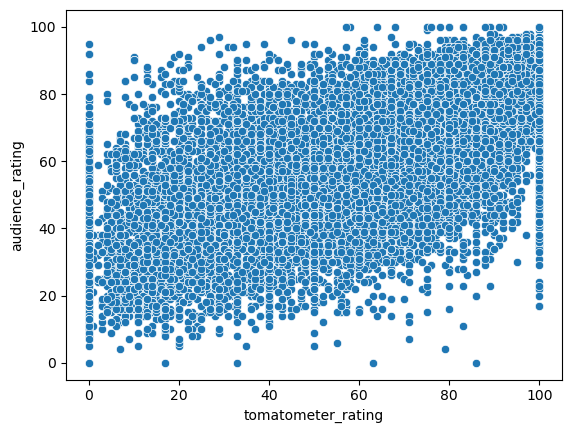

In [356]:
sns.scatterplot(data.dropna(),x='tomatometer_rating',y='audience_rating');

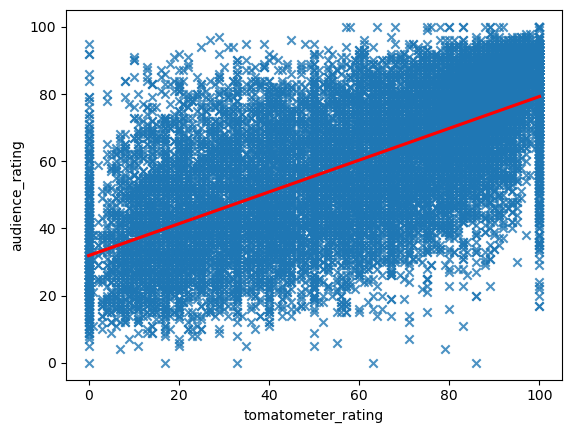

In [357]:
sns.regplot(data.dropna(), x='tomatometer_rating', y='audience_rating',fit_reg=True,line_kws=dict(color="r"),marker='x');

If we were to build a basemodel with only a single feature, without any data preprocessing, the results would be as follows

In [359]:
df = data.dropna()
X = df[['tomatometer_rating']]
y = df['audience_rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)
slr = LinearRegression()
slr.fit(X_train,y_train)
print('R2 Score:' , slr.score(X_test,y_test))

R2 Score: 0.41851821685147617


2. Comparing with this basemodel r2_score, **the score given by our proposed model is better**

3. **Reason for not choosing DecisionTreeRegressor, RandomForestRegressor**
   - Decision Tree Regressor is prone to overfitting.
   - After trying out with RandomForestRegressor - the r2_score was around 0.55 which is not a very significant improvement over the proposed LinearRegression model